In [9]:
import pandas as pd

# Example: load a CSV in Colab
df = pd.read_csv('/content/marketing_AB.csv')
df.head()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124.0,ad,False,130.0,Monday,20.0
1,1,1119715.0,ad,False,93.0,Tuesday,22.0
2,2,1144181.0,ad,False,21.0,Tuesday,18.0
3,3,1435133.0,ad,False,355.0,Tuesday,10.0
4,4,1015700.0,ad,False,276.0,Friday,14.0


In [6]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [15]:
df['test group'].value_counts(dropna=False)

,count
test group,
ad,564577
psa,23524


In [16]:
# Separate control and test groups
control_group = df[df['test group'] == 'ad']
test_group = df[df['test group'] == 'psa']

# Check number of observations
print("Control group size:", control_group.shape[0])
print("Test group size:", test_group.shape[0])


Control group size: 564577
Test group size: 23524


In [10]:
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [13]:
print("Control group size:", control_group.shape[0])
print("Test group size:", test_group.shape[0])

Control group size: 0
Test group size: 0


In [18]:
import numpy as np
from scipy import stats

# two-sample t-test example
groupA = df[df['test group'] == 'ad']['converted']
groupB = df[df['test group'] == 'psa']['converted']

t_stat, p_value = stats.ttest_ind(groupA, groupB)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 7.37040597428566
p-value: 1.7033052627831264e-13


In [20]:
from scipy import stats

# Define the metrics for the t-test using the 'converted' column
control_metric = control_group['converted']
test_metric = test_group['converted']

t_stat, p_value = stats.ttest_ind(
    control_metric,
    test_metric,
    equal_var=False  # safer for real-world data
)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 8.657162314551679
p-value: 5.107607598758945e-18


In [22]:
alpha = 0.05 # Define the significance level

if p_value < alpha:
    print("Reject the null hypothesis (H0)")
else:
    print("Fail to reject the null hypothesis (H0)")

Reject the null hypothesis (H0)


In [23]:
# Calculate mean (conversion rate)
control_mean = control_metric.mean()
test_mean = test_metric.mean()

print("Control group conversion rate:", round(control_mean, 4))
print("Test group conversion rate:", round(test_mean, 4))


Control group conversion rate: 0.0255
Test group conversion rate: 0.0179


In [24]:
lift = (test_mean - control_mean) / control_mean * 100
print("Lift (%):", round(lift, 2))


Lift (%): -30.11


In [26]:
contingency_table = pd.crosstab(df['test group'], df['converted'])
contingency_table

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [27]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Chi-square statistic: 54.005823883685245
p-value: 1.9989623063390075e-13


In [28]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis (H0)")
else:
    print("Fail to reject the null hypothesis (H0)")


Reject the null hypothesis (H0)


In [29]:
stats.ttest_ind(control_metric, test_metric, equal_var=False)


TtestResult(statistic=np.float64(8.657162314551679), pvalue=np.float64(5.107607598758945e-18), df=np.float64(26384.190955086437))

In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['test group'], df['converted'])
print(contingency_table)


converted    False  True 
test group               
ad          550154  14423
psa          23104    420


In [32]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)


Chi-square statistic: 54.005823883685245
p-value: 1.9989623063390075e-13


In [11]:
import pandas as pd
from scipy.stats import chi2_contingency

# Re-create contingency_table and calculate p_value to ensure it's defined
contingency_table = pd.crosstab(df['test group'], df['converted'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis (H0)")
else:
    print("Fail to reject the null hypothesis (H0)")

Reject the null hypothesis (H0)


In [16]:
import numpy as np
from scipy import stats

# Sample sizes
n_control = len(control_metric)
n_test = len(test_metric)

# Conversion rates (means)
p_control = control_metric.mean()
p_test = test_metric.mean()

# Difference in proportions
diff = p_test - p_control


In [17]:
# Standard error of difference in proportions
se = np.sqrt(
    (p_control * (1 - p_control) / n_control) +
    (p_test * (1 - p_test) / n_test)
)


In [18]:
# Z value for 95% confidence
z = stats.norm.ppf(1 - 0.05/2)

# Confidence interval
ci_lower = diff - z * se
ci_upper = diff + z * se

print("Difference in conversion rates:", round(diff, 4))
print("95% Confidence Interval: (", round(ci_lower, 4), ",", round(ci_upper, 4), ")")


Difference in conversion rates: -0.0236
95% Confidence Interval: ( -0.0277 , -0.0195 )


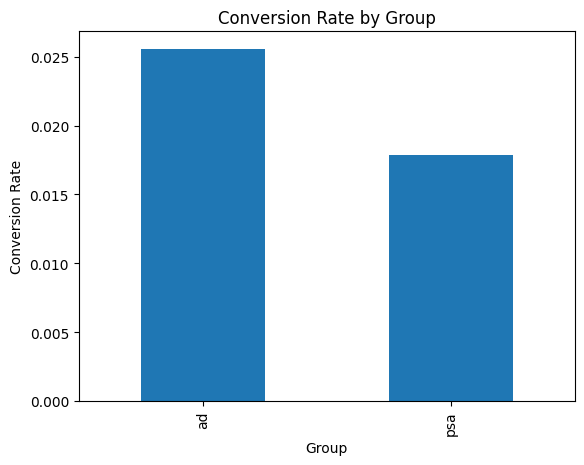

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv('/content/marketing_AB.csv')

# Calculate conversion rate by group
group_rates = df.groupby('test group')['converted'].mean()

# Plot
plt.figure()
group_rates.plot(kind='bar')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Group')
plt.show()


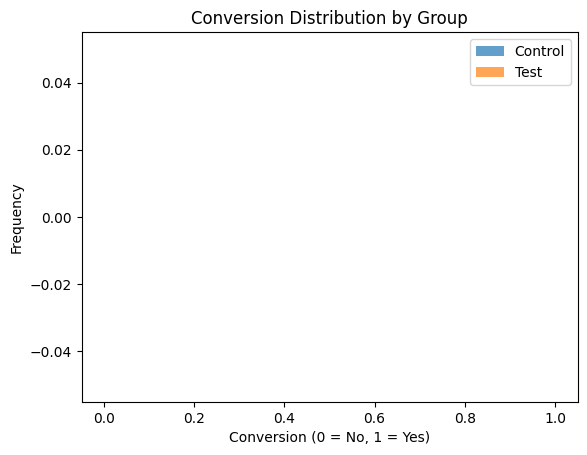

In [21]:
control = df[df['test group'] == 'control']['converted']
test = df[df['test group'] == 'test']['converted']

plt.figure()
plt.hist(control, bins=2, alpha=0.7, label='Control')
plt.hist(test, bins=2, alpha=0.7, label='Test')
plt.xlabel('Conversion (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.title('Conversion Distribution by Group')
plt.legend()
plt.show()
